In [1]:
import gempy as gp
import gempy_viewer as gpv
import pickle
import vtk

from gempy.core.data import GeoModel
from gempy.core.data import Grid
from gempy.core.data.grid_modules import RegularGrid
# from PyQt6 import QtWidgets, QtGui

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pyvista as pv
from gempy_engine.core.data.stack_relation_type import StackRelationType


np.random.seed(55500)

Setting Backend To: AvailableBackends.numpy


In [2]:
geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name='Model1',
    extent=[853610.2891, 855569.4948, 987530.5888, 988620.4712, -6600, 4000], #x, y, z
    resolution=None,
    refinement=4, # We will use octrees
    importer_helper= gp.data.ImporterHelper(
        path_to_orientations= "capas_model_orientaciones.csv",
        path_to_surface_points= "capas_model_points.csv",

    )
)

In [3]:
geo_model.surface_points_copy

X,Y,Z,id,nugget
853614.29,988145.94,1168.10,15278823,0.00
853677.07,988145.94,943.33,15278823,0.00
853725.02,988145.94,760.64,15278823,0.00
853780.59,988145.94,548.98,15278823,0.00
853846.73,988145.94,490.77,15278823,0.00
853912.88,988145.94,432.56,15278823,0.00
853976.38,988145.94,411.39,15278823,0.00
854066.34,988145.94,421.98,15278823,0.00
854166.88,988145.94,448.43,15278823,0.00
854289.12,988145.94,399.79,15278823,0.00


In [4]:
geo_model.orientations_copy

X,Y,Z,G_x,G_y,G_z,id,nugget
853846.73,988145.94,490.77,0.64,0.00,0.77,15278823,0.01
855426.30,988145.94,231.47,-0.64,-0.00,0.77,15278823,0.01
854890.72,987648.61,95.86,0.00,0.50,0.87,15278823,0.01
854890.72,988467.86,561.28,0.00,-0.87,0.50,15278823,0.01
854345.21,988145.94,-583.18,1.00,0.00,0.05,128039963,0.01
855145.25,988145.94,-602.06,-1.00,-0.00,0.07,128039963,0.01
854890.72,987868.40,-1031.10,0.00,1.00,0.03,128039963,0.01
854890.72,988353.06,-907.12,0.00,-1.00,0.03,128039963,0.01
853829.27,988145.94,300.27,0.64,0.00,0.77,276203590,0.01
855424.71,988145.94,-241.07,-0.64,-0.00,0.77,276203590,0.01


In [5]:
geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=default_formation,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Complejo_Dacitico,
	color=#015482,
	is_active=True
),
Element(
	name=Cuerpo_Intrusivo,
	color=#9f0052,
	is_active=True
),
Element(
	name=Flujo_Piroclastico,
	color=#ffbe00,
	is_active=True
),
Element(
	name=Sucesion_Piroclastica,
	color=#728f02,
	is_active=True
),
Element(
	name=Sucesion_Volcanica,
	color=#443988,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

In [6]:
gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object=  # TODO: This mapping I do not like it too much. We should be able to do it passing the data objects directly
    {
        "Strat_Series1": ('Complejo_Dacitico'),     
        "Strat_Series2": ('Cuerpo_Intrusivo'),
        "Strat_Series3": ('Flujo_Piroclastico'),
        "Strat_Series4": ('Sucesion_Piroclastica'),
        "Strat_Series5": ('Sucesion_Volcanica')
    }
)
geo_model.structural_frame  # Display the resulting structural frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Strat_Series1,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Complejo_Dacitico,
	color=#015482,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series2,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Cuerpo_Intrusivo,
	color=#9f0052,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series3,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Flujo_Piroclastico,
	color=#ffbe00,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series4,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Sucesion_Piroclastica,
	color=#728f02,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series5,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Sucesion_Volcanica,
	color=#443988,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False]],

C:\Users\user\anaconda3\envs\Gempy_Mesh\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


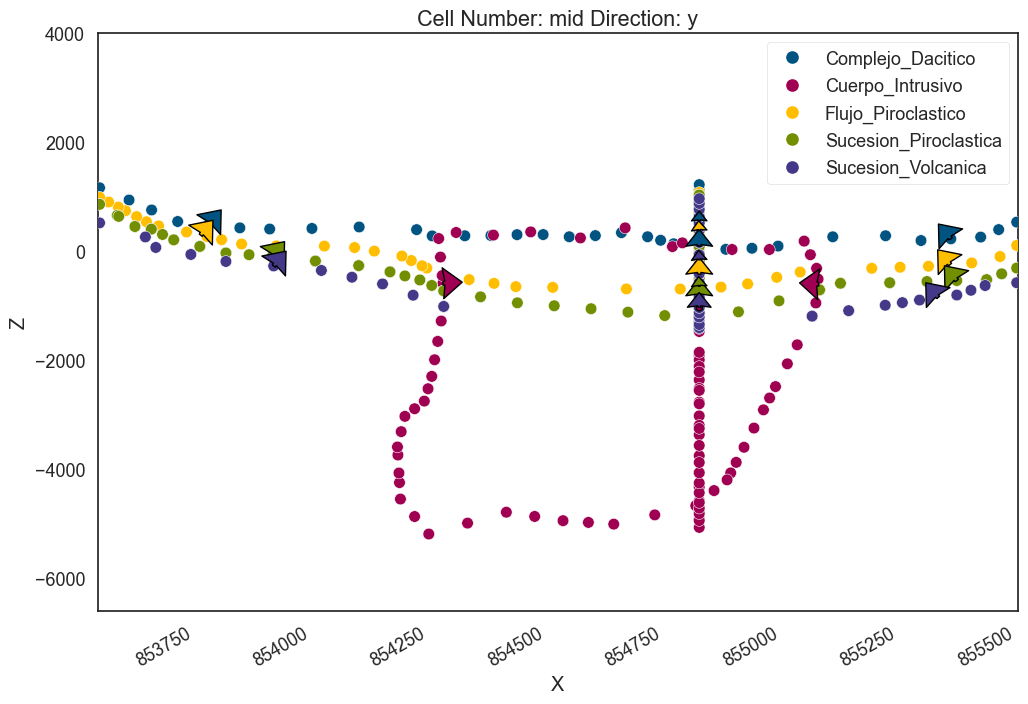

In [7]:
plot = gpv.plot_2d(geo_model, show_lith=False, show_boundaries=False)

In [8]:
geo_model.interpolation_options

InterpolationOptions(kernel_options={'range': 1.7, 'c_o': 10, 'uni_degree': 1, 'i_res': 4, 'gi_res': 2, 'number_dimensions': 3, 'kernel_function': <AvailableKernelFunctions.cubic: KernelFunction(base_function=<function cubic_function at 0x000002B66EBD0550>, derivative_div_r=<function cubic_function_p_div_r at 0x000002B66EBD0B80>, second_derivative=<function cubic_function_a at 0x000002B66EBD0C10>, consume_sq_distance=False)>, 'kernel_solver': <Solvers.DEFAULT: 1>, 'compute_condition_number': False, 'optimizing_condition_number': False, 'condition_number': None}, evaluation_options={'_number_octree_levels': 4, '_number_octree_levels_surface': 4, 'octree_curvature_threshold': -1, 'octree_error_threshold': 1.0, 'octree_min_level': 2, 'mesh_extraction': True, 'mesh_extraction_masking_options': <MeshExtractionMaskingOptions.INTERSECT: 3>, 'mesh_extraction_fancy': True, 'evaluation_chunk_size': 500000, 'compute_scalar_gradient': False, 'verbose': False}, temp_interpolation_values=<gempy_engine.core.data.options.temp_interpolation_values.TempInterpolationValues object at 0x000002B6772E2110>, debug=True, cache_mode=CacheMode.IN_MEMORY_CACHE, cache_model_name=Model1, block_solutions_type=BlockSolutionType.OCTREE, sigmoid_slope=50000, debug_water_tight=False)

In [9]:
sol = gp.compute_model(geo_model)
sol

Setting Backend To: AvailableBackends.numpy
Chunking done: 10 chunks
Chunking done: 7 chunks
Chunking done: 10 chunks


Solutions(4 Octree Levels, 5 DualContouringMeshes)

In [10]:
geo_model.solutions

Solutions(4 Octree Levels, 5 DualContouringMeshes)

C:\Users\user\anaconda3\envs\Gempy_Mesh\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


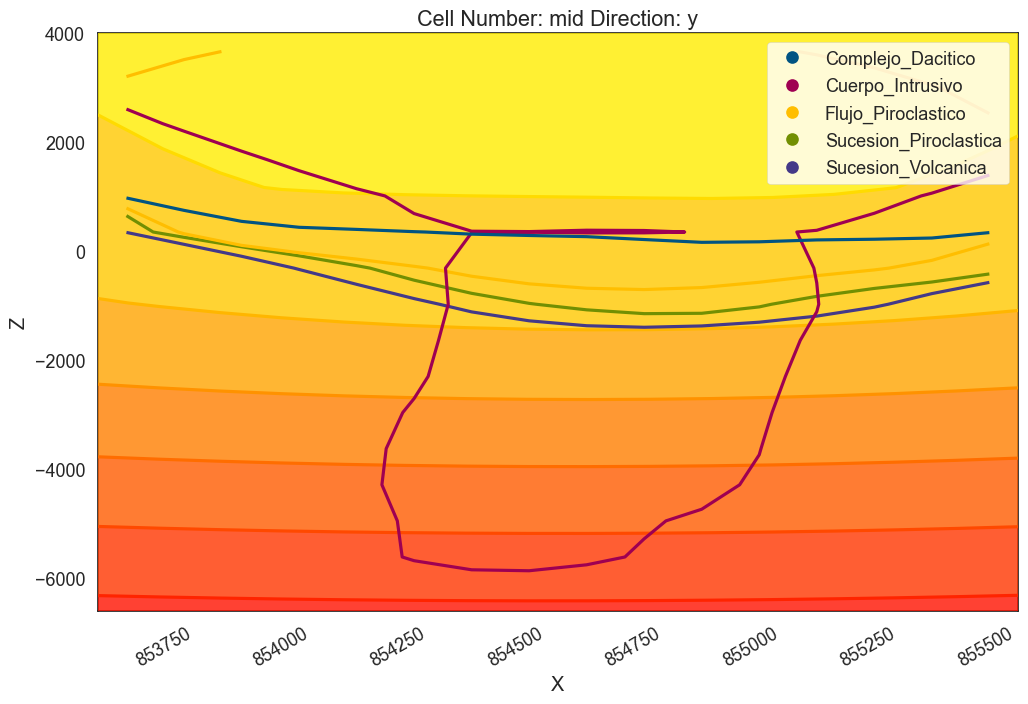

In [11]:
gpv.plot_2d(
    model=geo_model,
    series_n=0,  # This will plot the scalar field used for the fault
    show_data=False,
    show_scalar=True,
    show_lith=False
)

In [12]:


# gp.compute_model(geo_model)
# gpv.plot_2d(geo_model, 
#             show_topography=True,
#            show_data=True,
#            ve=0.20,
#            figsize=(12,12),
#            show_block=False, 
#             show_values=False,)

In [13]:
gp.set_section_grid(
    grid=geo_model.grid,
    section_dict={
        'Transecta_X': ([853614, 988100], [855566, 988100], [100, 80]), #xi,yi,xf,yf,zi,zf
        'Transecta_Y': ([854750, 987541], [854750, 988613], [100, 80]),
    }  # p1,p2,resolution
)

Active grids: GridTypes.NONE|SECTIONS|OCTREE


,start,stop,resolution,dist
Transecta_X,"[853614, 988100]","[855566, 988100]","[100, 80]",1952.0
Transecta_Y,"[854750, 987541]","[854750, 988613]","[100, 80]",1072.0


In [14]:
geo_model.grid.active_grids

<GridTypes.NONE|SECTIONS|OCTREE: 1041>

C:\Users\user\anaconda3\envs\Gempy_Mesh\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:200: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.fig.show()


<function gempy_viewer.modules.plot_2d.drawer_traces_2d.plot_section_traces(gempy_model: gempy.core.data.geo_model.GeoModel, ax, section_names: list[str] = None)>

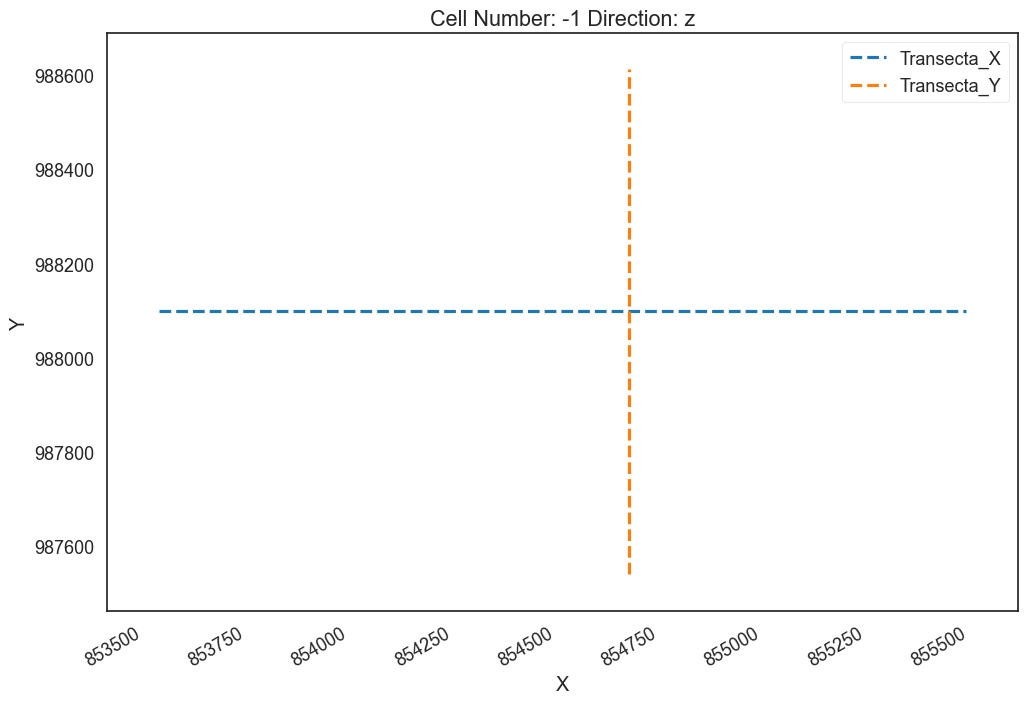

In [15]:
gpv.plot_section_traces(geo_model)

In [16]:
geo_model.interpolation_options.mesh_extraction = False


In [17]:
gp.set_topography_from_file(
    grid=geo_model.grid,
    filepath=os.path.join("Volcan_CM2.tif"),
)

Active grids: GridTypes.NONE|SECTIONS|TOPOGRAPHY|OCTREE


In [18]:
geo_model.grid

Grid(values=array([[853671.51427813, 987564.647625  ,  -6268.75      ],
       [853671.51427813, 987564.647625  ,  -5606.25      ],
       [853671.51427813, 987564.647625  ,  -4943.75      ],
       ...,
       [854750.        , 988613.        ,   3731.64556962],
       [854750.        , 988613.        ,   3865.82278481],
       [854750.        , 988613.        ,   4000.        ]]), length=array([], dtype=float64), _octree_grid=RegularGrid(resolution=array([16, 16, 16]), extent=array([853610.2891, 855569.4948, 987530.5888, 988620.4712,  -6600.    ,
         4000.    ]), values=array([[853671.51427813, 987564.647625  ,  -6268.75      ],
       [853671.51427813, 987564.647625  ,  -5606.25      ],
       [853671.51427813, 987564.647625  ,  -4943.75      ],
       ...,
       [855508.26962188, 988586.412375  ,   2343.75      ],
       [855508.26962188, 988586.412375  ,   3006.25      ],
       [855508.26962188, 988586.412375  ,   3668.75      ]]), mask_topo=array([], shape=(0, 3), dtype=bo

In [19]:
# gp.compute_model(geo_model)
# gpv.plot_2d(geo_model, show_topography=True, section_names=['topography'])

Setting Backend To: AvailableBackends.numpy
Chunking done: 9 chunks
Chunking done: 6 chunks
Chunking done: 9 chunks


C:\Users\user\anaconda3\envs\Gempy_Mesh\lib\site-packages\gempy_viewer\API\_plot_2d_sections_api.py:105: UserWarning: Section contacts not implemented yet. We need to pass scalar field for the sections grid
  warnings.warn(
C:\Users\user\anaconda3\envs\Gempy_Mesh\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


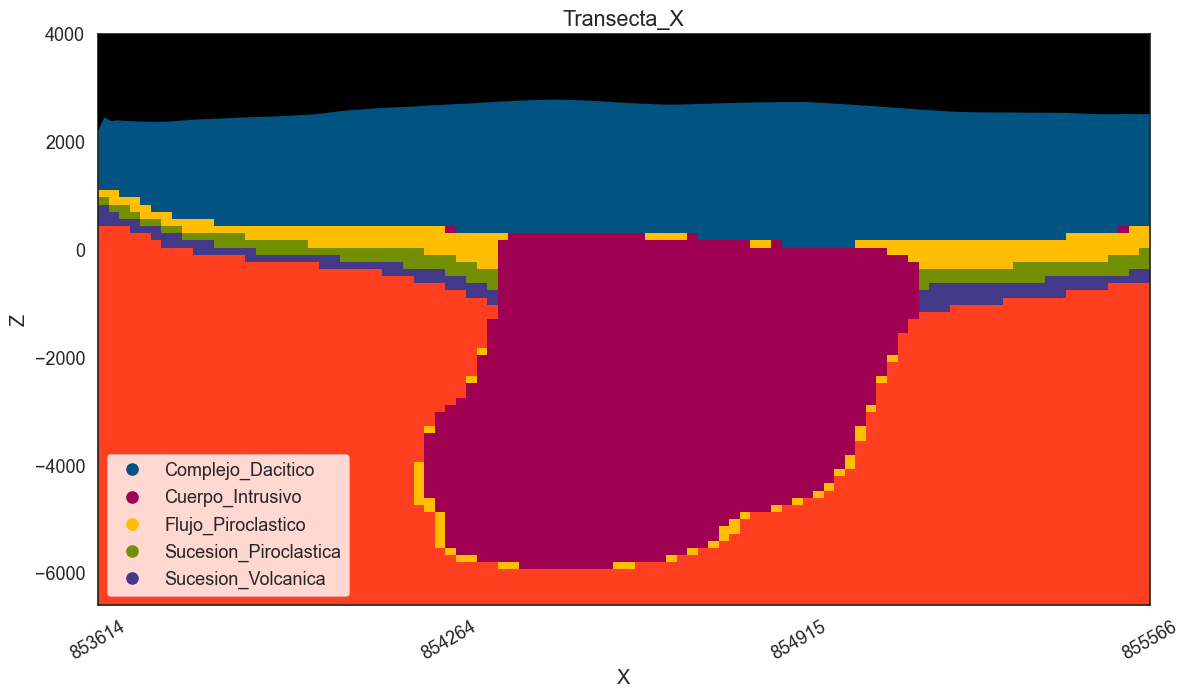

In [20]:
gp.compute_model(geo_model)
gpv.plot_2d(geo_model, 
            section_names=['Transecta_X'], 
            show_topography=True, 
            figsize=(12, 17), 
            show_block=False, 
            show_values=False, 
            n_axis=2, 
            legend=True,
            show_data=False, 
            ve=0.10)

ValueError: Section name not in grid

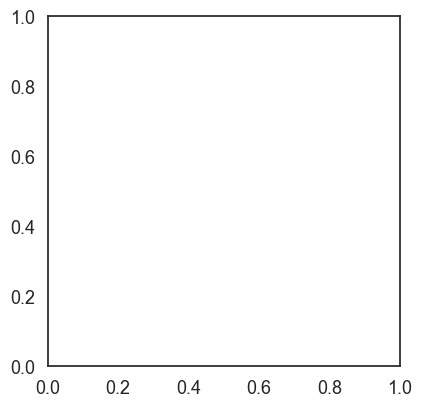

In [21]:
# gp.compute_model(geo_model)
gpv.plot_2d(
    model=geo_model,
    section_names=['Transecta Y', 'Transecta X', 'topography'],
    show_topography=True, 
    figsize=(10, 10), 
    show_block=False, 
    show_values=False, 
    n_axis=3, 
    show_data=False, 
    ve=0.10
)
# sphinx_gallery_thumbnail_number = 4